Sample prediction: [0.50039928]


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_34044\3698016806.py:49: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[0, :], X[1, :], c=np.take(colors, Y.ravel()), cmap=plt.cm.Spectral)


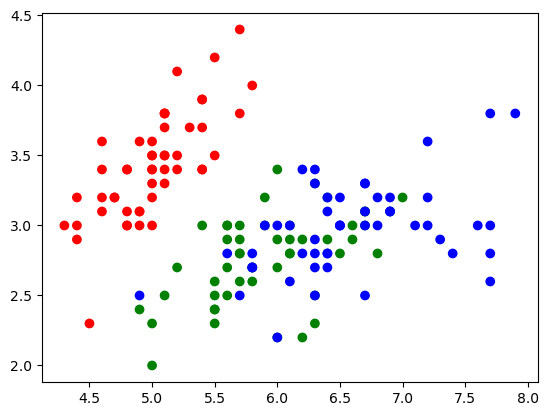

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Load Iris dataset
iris = load_iris()
X = iris.data.T  # Transpose to get features as columns
Y = iris.target.reshape(1, -1)  # Reshape target vector

# One-hot encode target variable (optional for classification problems)
# from sklearn.preprocessing import OneHotEncoder
# encoder = OneHotEncoder(sparse=False)
# Y = encoder.fit_transform(Y)

# Define the neural network (feedforward architecture)
class NeuralNetwork:
    def __init__(self, input, hidden, output):
        self.input = input
        self.hidden = hidden
        self.output = output
        self.W1 = np.random.randn(hidden, input) * 0.01  
        self.b1 = np.zeros((hidden, 1))
        self.W2 = np.random.randn(output, hidden) * 0.01  
        self.b2 = np.zeros((output, 1))
    

    def fwd_prg(self, X):
        self.z1 = np.dot(self.W1, X) + self.b1  # Forward propagation
        self.A1 = np.tanh(self.z1)  
        self.z2 = np.dot(self.W2, self.A1) + self.b2  
        self.A2 = self.sigmoid(self.z2) 
        return self.A2

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))  # Sigmoid activation function )

# Model parameters 
input, hidden, output = 4, 8, 1  
# Create and train the model 
model = NeuralNetwork(input, hidden, output)
predicted_Y = model.fwd_prg(X)  # Make predictions using forward pass

# Print or visualize results 
print("Sample prediction:", predicted_Y[:, 0])  # Assuming regression output
# Define color mapping for classes (assuming three classes)
colors = ['red', 'green', 'blue']  # Adjust colors as needed

# Plot data with color based on class label
plt.scatter(X[0, :], X[1, :], c=np.take(colors, Y.ravel()), cmap=plt.cm.Spectral)
plt.show()